In [7]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")

# 데이터 상위 5개 행 출력
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 폰트 경로 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# 설정 강제 적용
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# Seaborn 스타일
sns.set(style="whitegrid")

# 적용 확인
print("✅ 적용된 폰트 이름:", font_name)

✅ 적용된 폰트 이름: Malgun Gothic


# **데이터 컬럼요약**

In [15]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")

# 컬럼 요약 정리
summary = pd.DataFrame({
    "DataType": df.dtypes,
    "ExampleValue": df.iloc[0],
    "UniqueCount": df.nunique(),
    "MissingCount": df.isnull().sum()
}).reset_index().rename(columns={"index": "Column"})

# 출력
print(summary)

                     Column DataType       ExampleValue  UniqueCount  \
0                 Person ID    int64                  1          374   
1                    Gender   object               Male            2   
2                       Age    int64                 27           31   
3                Occupation   object  Software Engineer           11   
4            Sleep Duration  float64                6.1           27   
5          Quality of Sleep    int64                  6            6   
6   Physical Activity Level    int64                 42           16   
7              Stress Level    int64                  6            6   
8              BMI Category   object         Overweight            4   
9            Blood Pressure   object             126/83           25   
10               Heart Rate    int64                 77           19   
11              Daily Steps    int64               4200           20   
12           Sleep Disorder   object                NaN         

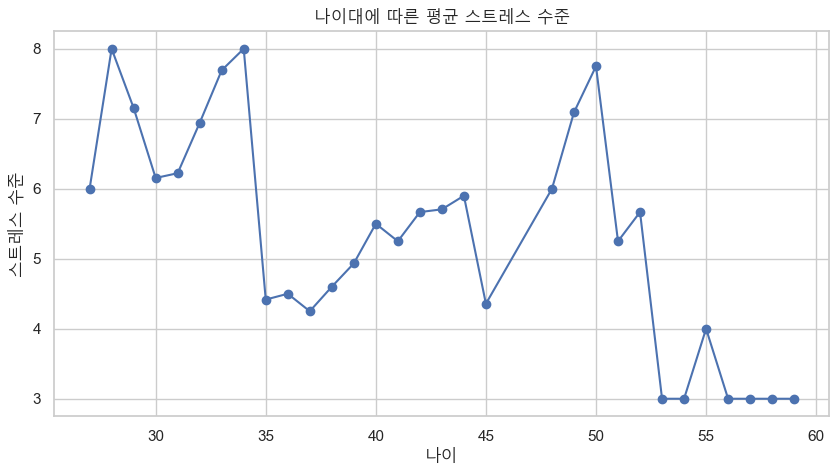

In [16]:
age_stress = df.groupby("Age")["Stress Level"].mean()

plt.figure(figsize=(10, 5))
plt.plot(age_stress.index, age_stress.values, marker='o')
plt.title("나이대에 따른 평균 스트레스 수준", fontproperties=font_prop)
plt.xlabel("나이", fontproperties=font_prop)
plt.ylabel("스트레스 수준", fontproperties=font_prop)
plt.grid(True)
plt.show()

## 연령대별로 수면시간 시각화

<Axes: xlabel='Age'>

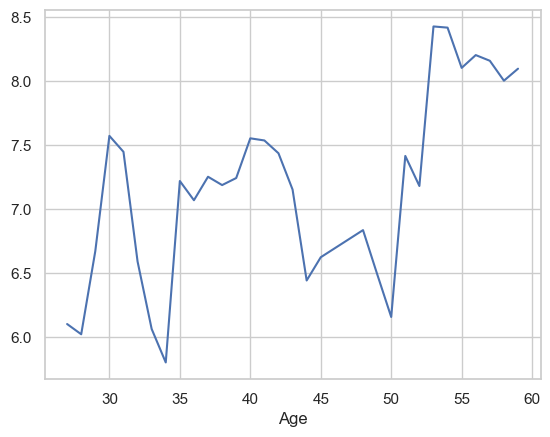

In [17]:
df.groupby("Age")["Sleep Duration"].mean().plot()

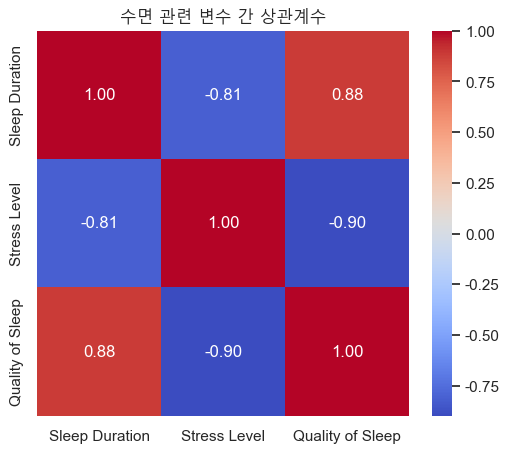

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 변수만 추출
corr_df = df[["Sleep Duration", "Stress Level", "Quality of Sleep"]]

# 상관계수 계산
corr_matrix = corr_df.corr()

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("수면 관련 변수 간 상관계수", fontproperties=font_prop)
plt.show()

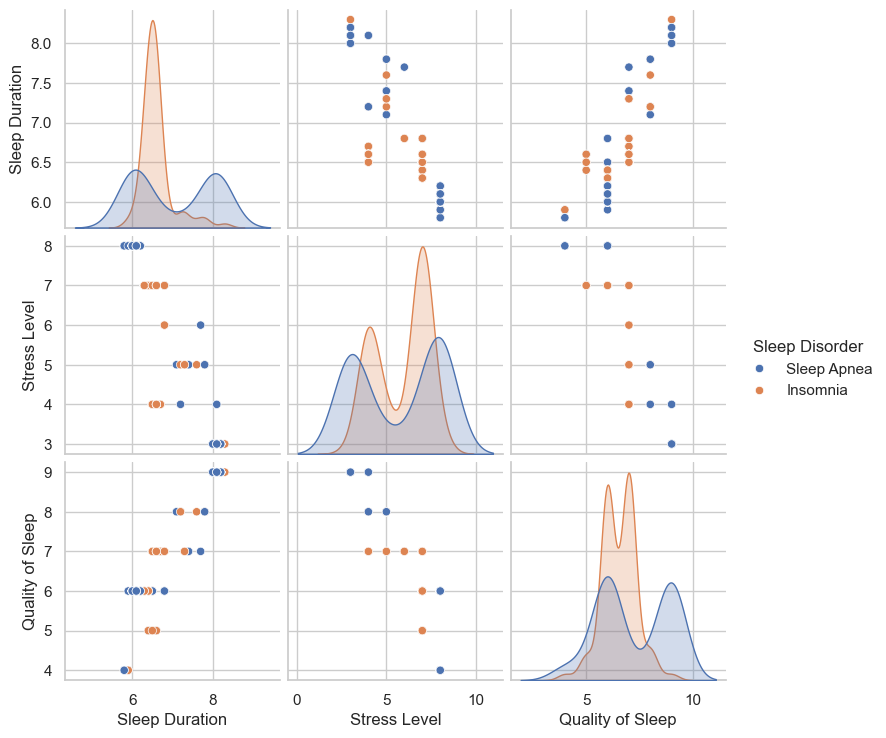

In [29]:
sns.pairplot(df[cols + ["Sleep Disorder"]], hue="Sleep Disorder")
plt.show()

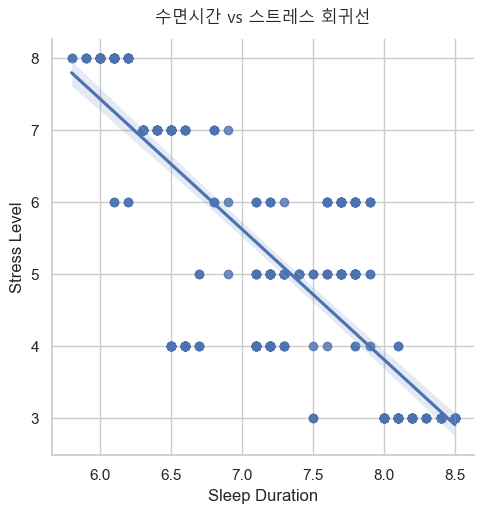

In [23]:
sns.lmplot(data=df, x="Sleep Duration", y="Stress Level")
plt.title("수면시간 vs 스트레스 회귀선" , y=1.02 , fontproperties=font_prop)
plt.show()

In [30]:
# 수축기/이완기로 분리
df[["Systolic", "Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)

## 아래 표를 보고 데이터간 상관관계 파악하기

1) Stress Level이 높으면 Heart Rate는 0.67의 양의 관계, Quqlity of sleep, sleep Duration의 수치들은 음의 관계
2) Sleep Duration 수치가 높아질 수록 Heart Rate, Stress Level은 낮아지는 음의 관계, Quality of Sleep수치와는 양의 관계
3) Quality of Sleep 수치가 높아질 수록 Heat Rate, Stress Level은 낮아지는 음의 관계
4) Heat Rate 수치가 높아질 수록 Stress Level 은 높아지는 0.67양의 관계   

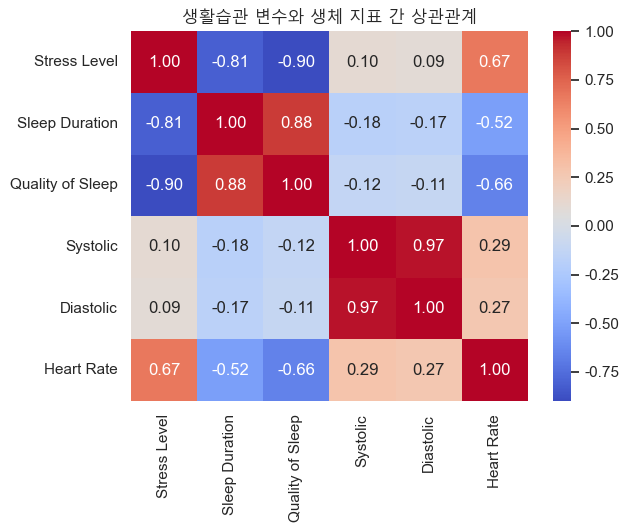

In [31]:
corr_cols = ["Stress Level", "Sleep Duration", "Quality of Sleep", "Systolic", "Diastolic", "Heart Rate"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("생활습관 변수와 생체 지표 간 상관관계", fontproperties=font_prop)
plt.show()

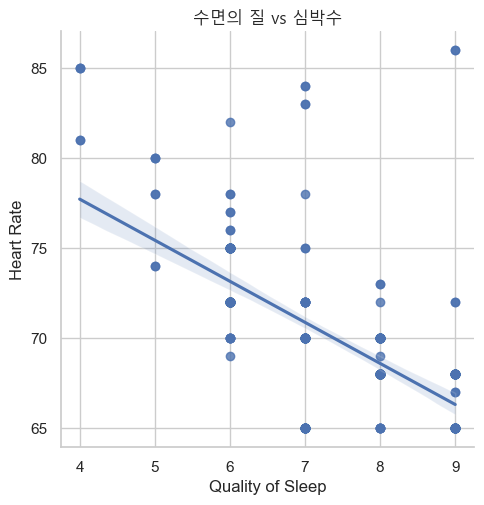

In [34]:
sns.lmplot(data=df, x="Quality of Sleep", y="Heart Rate")
plt.title("수면의 질 vs 심박수" , fontproperties=font_prop)
plt.show()

### ✨ 마무리 문구

> 수면시간과 수면의 질이 높을수록 스트레스와 심박수는 낮아지는 음의 상관관계를 보이며, 스트레스가 높을수록 심박수는 강한 양의 상관을 가진다. 이로써 수면 습관은 생체 반응과 밀접한 관련이 있음을 알 수 있다.